<a href="https://colab.research.google.com/github/baobao1022002/LabMachineLearning/blob/master/Lab_5_20130475_NguyenQuocBao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **SVM** to classification tasks and compare its performance with other competitive algorithms. In general, **SVM** is one of the most popular and widely used supervised machine learning algorithms.

*   **Deadline: 23:59, 17/03/2023**



# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
from prettytable import PrettyTable
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
import time
from keras.datasets import mnist


#Task 1. 
For breast cancer dataset (https://tinyurl.com/3vme8hr3) which could be loaded from datasets in sklearn as follows:

```
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
```

*   1.1.	Apply SVM algorithm to above dataset using linear kernel.
*   1.2.	Compare the obtained results with other competitive algorithms (Logistic Regression, Decision Tree, kNN) based on metrics: accuracy, precision, recall, f1 measures.



In [36]:
# Import scikit-learn dataset library


# Load dataset
cancer = datasets.load_breast_cancer()



In [37]:

X_train, X_test, Y_train, Y_test = train_test_split(cancer['data'], cancer['target'], test_size = 0.3,random_state=0)

In [ ]:

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train) 

y_predReg = classifier.predict(X_test)

preReg=precision_score(Y_test, y_predReg,average='macro')
recReg=recall_score(Y_test, y_predReg,average="macro")
f1ScoreReg=f1_score(Y_test, y_predReg,average="macro")
accReg=accuracy_score(Y_test, y_predReg)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

model = KNeighborsClassifier(n_neighbors=5)
# Train the model using the training sets
model.fit(X_train,Y_train)
#Predict Output
y_predKNN = model.predict(X_test) 

preKNN=precision_score(Y_test, y_predKNN,average='macro')
recKNN=recall_score(Y_test, y_predKNN,average="macro")
f1ScoreKNN=f1_score(Y_test, y_predKNN,average="macro")
accKNN=accuracy_score(Y_test, y_predKNN)

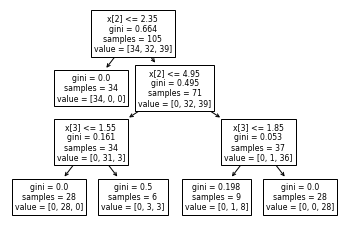

In [ ]:

clf_modelDecisionTree = DecisionTreeClassifier(criterion="gini", random_state=42,
max_depth=3, min_samples_leaf=5)
clf_modelDecisionTree.fit(X_train,Y_train)
# Plot decision tree
tree.plot_tree(clf_modelDecisionTree)
# Predict X_test
y_predDecisionTree = clf_modelDecisionTree.predict(X_test)

preDecisionTree=precision_score(Y_test, y_predDecisionTree,average='macro')
recDecisionTree=recall_score(Y_test, y_predDecisionTree,average="macro")
f1ScoreDecisionTree=f1_score(Y_test, y_predDecisionTree,average="macro")
accDecisionTree=accuracy_score(Y_test, y_predDecisionTree)

In [ ]:



clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_predSVM = clf.predict(X_test)

preSVM=precision_score(Y_test, y_predSVM,average='macro')
recSVM=recall_score(Y_test, y_predSVM,average="macro")
f1ScoreSVM=f1_score(Y_test, y_predSVM,average="macro")
accSVM=accuracy_score(Y_test, y_predSVM)




In [ ]:


t=PrettyTable(['Name metric mesura','SVM Kernel','Logistic Regression','kNN','Decision Tree'])
t.add_row(['Accuracy',accSVM,accReg,accKNN,accDecisionTree])
t.add_row(['Precision',preSVM,preReg,preKNN,preDecisionTree])
t.add_row(['Recall',recSVM,recReg,accKNN,recDecisionTree])
t.add_row(['F1 measures',f1ScoreSVM,f1ScoreReg,f1ScoreKNN,f1ScoreDecisionTree])
print(t)





+--------------------+--------------------+---------------------+--------------------+--------------------+
| Name metric mesura |     SVM Kernel     | Logistic Regression |        kNN         |   Decision Tree    |
+--------------------+--------------------+---------------------+--------------------+--------------------+
|      Accuracy      | 0.9777777777777777 |  0.9532163742690059 | 0.9777777777777777 | 0.9111111111111111 |
|     Precision      | 0.9722222222222222 |  0.9456084959816302 | 0.9722222222222222 | 0.912962962962963  |
|       Recall       | 0.9814814814814815 |  0.9563492063492063 | 0.9777777777777777 | 0.8905723905723906 |
|    F1 measures     | 0.975983436853002  |  0.9503628447024675 | 0.975983436853002  | 0.8982456140350877 |
+--------------------+--------------------+---------------------+--------------------+--------------------+


#Task 2. 

*   1.1.	Perform SVM algorithm to **Iris dataset** using **linear kernel**.
*   1.2.	Compare the obtained results in 1.1 with SVM using other kernels (**Polynomial Kernel, Gaussian Kernel, Sigmoid Kernel, Radial Basis Function Kernel**). Some metrics could be used: accuracy, precision, recall, f1 measures





In [20]:
data4 = datasets.load_iris()
X2=data4['data']
Y2=data4['target']
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.3,random_state=0)

In [21]:
clfLinear = svm.SVC(kernel='linear') # linear kernel
clfLinear.fit(X_train2, Y_train2)

#Predict the response for test dataset
y_predSVMLinear = clfLinear.predict(X_test2)

preSVMLinear=precision_score(Y_test2, y_predSVMLinear,average='macro')
recSVMLinear=recall_score(Y_test2, y_predSVMLinear,average="macro")
f1ScoreSVMLinear=f1_score(Y_test2, y_predSVMLinear,average="macro")
accSVMLinear=accuracy_score(Y_test2, y_predSVMLinear)


In [22]:
clfPoly = svm.SVC(kernel='poly') # Polynomial Kernel
clfPoly.fit(X_train2, Y_train2)
#Predict the response for test dataset
y_predSVMPoly = clfPoly.predict(X_test2)

preSVMPoly=precision_score(Y_test2, y_predSVMPoly,average='macro')
recSVMPoly=recall_score(Y_test2, y_predSVMPoly,average="macro")
f1ScoreSVMPoly=f1_score(Y_test2, y_predSVMPoly,average="macro")
accSVMPoly=accuracy_score(Y_test2, y_predSVMPoly)


In [23]:
clfRBF = svm.SVC(kernel='rbf') #  Radial Basis Function Kernel
clfRBF.fit(X_train2, Y_train2)
#Predict the response for test dataset
y_predSVMRBF = clfRBF.predict(X_test2)

preSVMRBF=precision_score(Y_test2, y_predSVMRBF,average='macro')
recSVMRBF=recall_score(Y_test2, y_predSVMRBF,average="macro")
f1ScoreSVMRBF=f1_score(Y_test2, y_predSVMRBF,average="macro")
accSVMRBF=accuracy_score(Y_test2, y_predSVMRBF)



In [24]:
clfSigmoid = svm.SVC(kernel='sigmoid') #  Sigmoid Kernel
clfSigmoid.fit(X_train2, Y_train2)
#Predict the response for test dataset
y_predSVMSigmoid = clfSigmoid.predict(X_test2)

preSVMSigmoid=precision_score(Y_test2, y_predSVMSigmoid,average='macro')
recSVMSigmoid=recall_score(Y_test2, y_predSVMSigmoid,average="macro")
f1ScoreSVMSigmoid=f1_score(Y_test2, y_predSVMSigmoid,average="macro")
accSVMSigmoid=accuracy_score(Y_test2, y_predSVMSigmoid)



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
t=PrettyTable(['Name metric mesura','Linear kernel','Polynomial Kernel','Sigmoid Kernel', 'Radial Basis Function Kernel'])
t.add_row(['Accuracy',accSVMLinear,accSVMPoly,accSVMSigmoid,accSVMRBF])
t.add_row(['Precision',preSVMLinear,preSVMPoly,preSVMSigmoid,preSVMRBF])
t.add_row(['Recall',recSVMLinear,recSVMPoly,recSVMSigmoid,recSVMRBF])
t.add_row(['F1 measures',f1ScoreSVMLinear,f1ScoreSVMPoly,f1ScoreSVMSigmoid,f1ScoreSVMRBF])
print(t)







+--------------------+--------------------+--------------------+---------------------+------------------------------+
| Name metric mesura |   Linear kernel    | Polynomial Kernel  |    Sigmoid Kernel   | Radial Basis Function Kernel |
+--------------------+--------------------+--------------------+---------------------+------------------------------+
|      Accuracy      | 0.9777777777777777 | 0.9777777777777777 | 0.24444444444444444 |      0.9777777777777777      |
|     Precision      | 0.9722222222222222 | 0.9722222222222222 | 0.08148148148148147 |      0.9722222222222222      |
|       Recall       | 0.9814814814814815 | 0.9814814814814815 |  0.3333333333333333 |      0.9814814814814815      |
|    F1 measures     | 0.975983436853002  | 0.975983436853002  | 0.13095238095238096 |      0.975983436853002       |
+--------------------+--------------------+--------------------+---------------------+------------------------------+


#Task 3. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with mnist dataset based on accuracy, precision, recall, f1 measures.


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Fetch the MNIST dataset from OpenML
mnist = fetch_openml('mnist_784')

# Split the dataset into training and testing sets
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=0)


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
classifier3 = LogisticRegression(random_state = 0)
classifier3.fit(X_train3, Y_train3) 

y_predReg3 = classifier3.predict(X_test3)

preReg3=precision_score(Y_test3, y_predReg3,average='macro')
recReg3=recall_score(Y_test3, y_predReg3,average="macro")
f1ScoreReg3=f1_score(Y_test3, y_predReg3,average="macro")
accReg3=accuracy_score(Y_test3, y_predReg3)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
model3 = KNeighborsClassifier(n_neighbors=5)
# Train the model3 using the training sets
model3.fit(X_train3,Y_train3)
#Predict Output
y_predKNN3 = model3.predict(X_test3) 

preKNN3=precision_score(Y_test3, y_predKNN3,average='macro')
recKNN3=recall_score(Y_test3, y_predKNN3,average="macro")
f1ScoreKNN3=f1_score(Y_test3, y_predKNN3,average="macro")
accKNN3=accuracy_score(Y_test3, y_predKNN3)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


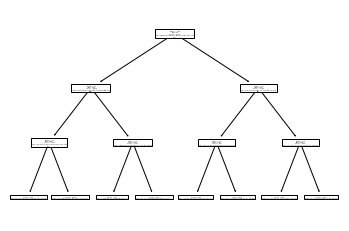

In [5]:
clf_modelDecisionTree3 = DecisionTreeClassifier(criterion="gini", random_state=42,
max_depth=3, min_samples_leaf=5)
clf_modelDecisionTree3.fit(X_train3,Y_train3)
# Plot decision tree
tree.plot_tree(clf_modelDecisionTree3)
# Predict X_test
y_predDecisionTree3 = clf_modelDecisionTree3.predict(X_test3)

preDecisionTree3=precision_score(Y_test3, y_predDecisionTree3,average='macro')
recDecisionTree3=recall_score(Y_test3, y_predDecisionTree3,average="macro")
f1ScoreDecisionTree3=f1_score(Y_test3, y_predDecisionTree3,average="macro")
accDecisionTree3=accuracy_score(Y_test3, y_predDecisionTree3)

In [ ]:
# clfLinear3 = svm.SVC(kernel='linear') # linear kernel
# clfLinear3.fit(X_train3, Y_train3)

# #Predict the response for test dataset
# y_predSVMLinear3 = clfLinear3.predict(X_test3)

# preSVMLinear3=precision_score(Y_test3, y_predSVMLinear3,average='macro')
# recSVMLinear3=recall_score(Y_test3, y_predSVMLinear3,average="macro")
# f1ScoreSVMLinear3=f1_score(Y_test3, y_predSVMLinear3,average="macro")
# accSVMLinear3=accuracy_score(Y_test3, y_predSVMLinear3)


In [ ]:
# mấy cái function của kernel khác nó chạy lâu cực luôn thầy :((
    
# clfPoly3 = svm.SVC(kernel='poly') # Polynomial Kernel
# clfPoly3.fit(X_train3, Y_train3)
# #Predict the response for test dataset
# y_predSVMPoly3 = clfPoly3.predict(X_test3)

# preSVMPoly3=precision_score(Y_test3, y_predSVMPoly3,average='macro')
# recSVMPoly3=recall_score(Y_test3, y_predSVMPoly3,average="macro")
# f1ScoreSVMPoly3=f1_score(Y_test3, y_predSVMPoly3,average="macro")
# accSVMPoly3=accuracy_score(Y_test3, y_predSVMPoly3)

In [ ]:
# clfRBF3 = svm.SVC(kernel='rbf') #  Radial Basis Function Kernel
# clfRBF3.fit(X_train3, Y_train3)
# #Predict the response for test dataset
# y_predSVMRBF3 = clfRBF3.predict(X_test3)

# preSVMRBF3=precision_score(Y_test3, y_predSVMRBF3,average='macro')
# recSVMRBF3=recall_score(Y_test3, y_predSVMRBF3,average="macro")
# f1ScoreSVMRBF3=f1_score(Y_test3, y_predSVMRBF3,average="macro")
# accSVMRBF3=accuracy_score(Y_test3, y_predSVMRBF3)

In [ ]:
# clfSigmoid3 = svm.SVC(kernel='sigmoid') #  Sigmoid Kernel
# clfSigmoid3.fit(X_train3, Y_train3)
# #Predict the response for test dataset
# y_predSVMSigmoid3 = clfSigmoid3.predict(X_test3)

# preSVMSigmoid3=precision_score(Y_test3, y_predSVMSigmoid3,average='macro')
# recSVMSigmoid3=recall_score(Y_test3, y_predSVMSigmoid3,average="macro")
# f1ScoreSVMSigmoid3=f1_score(Y_test3, y_predSVMSigmoid3,average="macro")
# accSVMSigmoid3=accuracy_score(Y_test3, y_predSVMSigmoid3)


In [6]:
t=PrettyTable(['Decision Tree', 'kNN', 'Logistic Regression','Name metric mesura'])
t.add_row(['Accuracy',accDecisionTree3,accKNN3,accReg3])
t.add_row(['Precision',preDecisionTree3,preKNN3,preReg3])
t.add_row(['Recall',recDecisionTree3,recKNN3,recReg3])
t.add_row(['F1 measures',f1ScoreDecisionTree3,f1ScoreKNN3,f1ScoreReg3])
print(t)


preReg3=precision_score(Y_test3, y_predReg3,average='macro')
recReg3=recall_score(Y_test3, y_predReg3,average="macro")
f1ScoreReg3=f1_score(Y_test3, y_predReg3,average="macro")
accReg3=accuracy_score(Y_test3, y_predReg3)



+---------------+---------------------+---------------------+--------------------+
| Decision Tree |         kNN         | Logistic Regression | Name metric mesura |
+---------------+---------------------+---------------------+--------------------+
|    Accuracy   | 0.49504761904761907 |  0.9700952380952381 | 0.9186666666666666 |
|   Precision   | 0.40486566520326034 |  0.9704297854438956 | 0.9175241086879247 |
|     Recall    | 0.48680825571680186 |  0.9696369884949784 | 0.9173871590842142 |
|  F1 measures  |  0.4269219036536572 |  0.9699026216193015 | 0.9173697624925989 |
+---------------+---------------------+---------------------+--------------------+


#Task 4. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with **credit card dataset** based on accuracy, precision, recall, f1 measures.

*   Give some comments on the obtained results
*   Identify issues with dataset, and propose the solutions to these issues



In [2]:
# code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/lab5'
dataset=pd.read_csv("creditcard.csv")

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML/lab5


In [3]:

train,validation, test = np.split(dataset.sample(frac=1), [int(.6*len(dataset)),
int(.8*len(dataset))])

X_train4 = train[[train.columns[i] for i in range(train.shape[1]-1) ]]
Y_train4 = train[train.columns[-1]]
# Assign the test split
X_test4 = test[[test.columns[i] for i in range(train.shape[1]-1) ]]
Y_test4 = test[test.columns[-1]]

In [4]:
classifier4 = LogisticRegression(random_state = 0)
classifier4.fit(X_train4, Y_train4) 

y_predReg4 = classifier4.predict(X_test4)

preReg4=precision_score(Y_test4, y_predReg4,average='macro')
recReg4=recall_score(Y_test4, y_predReg4,average="macro")
f1ScoreReg4=f1_score(Y_test4, y_predReg4,average="macro")
accReg4=accuracy_score(Y_test4, y_predReg4)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
model4 = KNeighborsClassifier(n_neighbors=5)
# Train the model using the training sets
model4.fit(X_train4,Y_train4)
#Predict Output
y_predKNN4 = model4.predict(X_test4) 

preKNN4=precision_score(Y_test4, y_predKNN4,average='macro')
recKNN4=recall_score(Y_test4, y_predKNN4,average="macro")
f1ScoreKNN4=f1_score(Y_test4, y_predKNN4,average="macro")
accKNN4=accuracy_score(Y_test4, y_predKNN4)

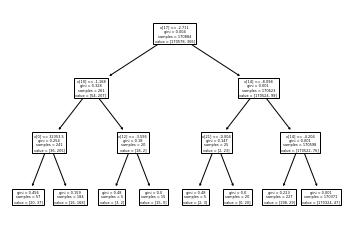

In [7]:

clf_modelDecisionTree4 = DecisionTreeClassifier(criterion="gini", random_state=42,
max_depth=3, min_samples_leaf=5)
clf_modelDecisionTree4.fit(X_train4,Y_train4)
# Plot decision tree
tree.plot_tree(clf_modelDecisionTree4)

y_predDecisionTree4 = clf_modelDecisionTree4.predict(X_test4)

preDecisionTree4=precision_score(Y_test4, y_predDecisionTree4,average='macro')
recDecisionTree4=recall_score(Y_test4, y_predDecisionTree4,average="macro")
f1ScoreDecisionTree4=f1_score(Y_test4, y_predDecisionTree4,average="macro")
accDecisionTree4=accuracy_score(Y_test4, y_predDecisionTree4)

In [5]:
#  em chạy cái này tận 10 phút mới xong á thầy :(
clfLinear4 = svm.SVC(kernel='linear') # linear kernel
clfLinear4.fit(X_train4, Y_train4)

#Predict the response for test dataset
y_predSVMLinear4 = clfLinear4.predict(X_test4)

preSVMLinear4=precision_score(Y_test4, y_predSVMLinear4,average='macro')
recSVMLinear4=recall_score(Y_test4, y_predSVMLinear4,average="macro")
f1ScoreSVMLinear4=f1_score(Y_test4, y_predSVMLinear4,average="macro")
accSVMLinear4=accuracy_score(Y_test4, y_predSVMLinear4)

In [ ]:
# mấy cái function của kernel khác nó cũng lâu nên em không chạy luôn 
 
#clfPoly4 = svm.SVC(kernel='poly') # Polynomial Kernel
# clfPoly4.fit(X_train4, Y_train4)
# #Predict the response for test dataset
# y_predSVMPoly4 = clfPoly4.predict(X_test4)

# preSVMPoly4=precision_score(Y_test4, y_predSVMPoly4,average='macro')
# recSVMPoly4=recall_score(Y_test4, y_predSVMPoly4,average="macro")
# f1ScoreSVMPoly4=f1_score(Y_test4, y_predSVMPoly4,average="macro")
# accSVMPoly4=accuracy_score(Y_test4, y_predSVMPoly4)


In [ ]:
# clfRBF4 = svm.SVC(kernel='rbf') #  Radial Basis Function Kernel
# clfRBF4.fit(X_train4, Y_train4)
# #Predict the response for test dataset
# y_predSVMRBF4 = clfRBF4.predict(X_test4)

# preSVMRBF4=precision_score(Y_test4, y_predSVMRBF4,average='macro')
# recSVMRBF4=recall_score(Y_test4, y_predSVMRBF4,average="macro")
# f1ScoreSVMRBF4=f1_score(Y_test4, y_predSVMRBF4,average="macro")
# accSVMRBF4=accuracy_score(Y_test4, y_predSVMRBF4)


In [ ]:
# clfSigmoid4 = svm.SVC(kernel='sigmoid') #  Sigmoid Kernel
# clfSigmoid4.fit(X_train4, Y_train4)
# #Predict the response for test dataset
# y_predSVMSigmoid4 = clfSigmoid4.predict(X_test4)

# preSVMSigmoid4=precision_score(Y_test4, y_predSVMSigmoid4,average='macro')
# recSVMSigmoid4=recall_score(Y_test4, y_predSVMSigmoid4,average="macro")
# f1ScoreSVMSigmoid4=f1_score(Y_test4, y_predSVMSigmoid4,average="macro")
# accSVMSigmoid4=accuracy_score(Y_test4, y_predSVMSigmoid4)


In [11]:
t=PrettyTable(['Name metric mesura','Linear kernel','Logistic Regression','kNN','Decision Tree'])
t.add_row(['Accuracy',accSVMLinear4,accReg4,accKNN4,accDecisionTree4])
t.add_row(['Precision',preSVMLinear4,preReg4,preKNN4,preDecisionTree4])
t.add_row(['Recall',recReg4,recReg4,recKNN4,recDecisionTree4])
t.add_row(['F1 measures',f1ScoreSVMLinear4,f1ScoreReg4,f1ScoreKNN4,f1ScoreDecisionTree4])
print(t)









+--------------------+--------------------+---------------------+--------------------+--------------------+
| Name metric mesura |   Linear kernel    | Logistic Regression |        kNN         |   Decision Tree    |
+--------------------+--------------------+---------------------+--------------------+--------------------+
|      Accuracy      | 0.9984551104244935 |  0.9990871107053826 | 0.9982093325374811 | 0.9991397773954567 |
|     Precision      | 0.8269887093568358 |  0.8747801386006262 | 0.999104603391973  | 0.899736226634076  |
|       Recall       | 0.8818380297394809 |  0.8818380297394809 | 0.5188679245283019 | 0.8583234772520316 |
|    F1 measures     | 0.7313205378889232 |  0.8782760210635845 | 0.5359155368328229 | 0.8778940169845355 |
+--------------------+--------------------+---------------------+--------------------+--------------------+


#Finally,
Save a copy in your Github. Remember renaming the notebook.